# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [49]:

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


In [51]:
#Verificando se houver missing values
df.isnull().sum()

age            0
sex            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
ca             0
thal           0
num            0
flag_doente    0
dtype: int64

1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [52]:
# Criando a função
def analise_bivariada_qualitativa(df, response_var, explanatory_var):
    
    print(f"📊 Variável Resposta: {response_var} ({df[response_var].dtype})")
    print(f"🔍 Variável Explicativa: {explanatory_var} ({df[explanatory_var].dtype})")

    #Criação da tabela
    tab_qualitativa = pd.crosstab(index=df[explanatory_var],
                      columns=df[response_var],
                      margins=True,
                      margins_name='total')
    #Probabilidade
    tab_qualitativa['probabilidade'] = tab_qualitativa[1]/tab_qualitativa['total']
    #Chance
    tab_qualitativa['chance'] = tab_qualitativa[1]/tab_qualitativa[0]
    #Razão de chances (odds ratio)
    tab_qualitativa['odds_ratio'] = tab_qualitativa['chance'] / tab_qualitativa.loc['total', 'chance']
    #Logito
    tab_qualitativa['logito'] = np.log(tab_qualitativa['chance'])
    #WOE (Weight of Evidence)
    tab_qualitativa['WOE'] = np.log(tab_qualitativa['chance'] / tab_qualitativa.loc['total', 'chance'])

    
    return tab_qualitativa

In [53]:
analise_bivariada_qualitativa(df=df, 
                     response_var= 'flag_doente', 
                     explanatory_var='sex')

📊 Variável Resposta: flag_doente (int64)
🔍 Variável Explicativa: sex (float64)


flag_doente,0,1,total,probabilidade,chance,odds_ratio,logito,WOE
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
total,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [54]:
analise_bivariada_qualitativa(df=df, 
                     response_var= 'flag_doente', 
                     explanatory_var='cp')

📊 Variável Resposta: flag_doente (int64)
🔍 Variável Explicativa: cp (float64)


flag_doente,0,1,total,probabilidade,chance,odds_ratio,logito,WOE
cp,,,,,,,,
1.0,16,7,23,0.304348,0.437500,0.516187,-0.826679,-0.661286
2.0,41,9,50,0.180000,0.219512,0.258993,-1.516347,-1.350955
3.0,68,18,86,0.209302,0.264706,0.312315,-1.329136,-1.163743
4.0,39,105,144,0.729167,2.692308,3.176536,0.990399,1.155791
total,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [55]:
analise_bivariada_qualitativa(df=df, 
                     response_var= 'flag_doente', 
                     explanatory_var='fbs')

📊 Variável Resposta: flag_doente (int64)
🔍 Variável Explicativa: fbs (float64)


flag_doente,0,1,total,probabilidade,chance,odds_ratio,logito,WOE
fbs,,,,,,,,
0.0,141,117,258,0.453488,0.829787,0.979030,-0.186586,-0.021193
1.0,23,22,45,0.488889,0.956522,1.128558,-0.044452,0.120941
total,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [56]:
# Criando a função
def analise_bivariada_quantitativa(df, response_var, explanatory_var,num_group):
    
    # Categorização da variável em um número predeterminado de grupo
    df[explanatory_var + '_cat'] = pd.cut(df[explanatory_var], bins=num_group)

    
    print(f"📊 Variável Resposta: {response_var} ({df[response_var].dtype})")
    print(f"🔍 Variável Explicativa: {explanatory_var} ({df[explanatory_var].dtype})")

    #Criação da tabela
    tab_quantitativa = pd.crosstab(index=df[explanatory_var + '_cat'],
                      columns=df[response_var],
                      margins=True,
                      margins_name='total')

    #Probabilidade
    tab_quantitativa['probabilidade'] = tab_quantitativa[1]/tab_quantitativa['total']
    #Chance
    tab_quantitativa['chance'] = tab_quantitativa[1]/tab_quantitativa[0]
    #Razão de chances (odds ratio)
    tab_quantitativa['odds_ratio'] = tab_quantitativa['chance'] / tab_quantitativa.loc['total', 'chance']
    #Logito
    tab_quantitativa['logito'] = np.log(tab_quantitativa['chance'])
    #WOE (Weight of Evidence)
    tab_quantitativa['WOE'] = np.log(tab_quantitativa['chance'] / tab_quantitativa.loc['total', 'chance'])

    
    return tab_quantitativa

In [59]:
analise_bivariada_quantitativa(df=df, 
                     response_var= 'flag_doente', 
                     explanatory_var='age',
                     num_group=5)

📊 Variável Resposta: flag_doente (int64)
🔍 Variável Explicativa: age (float64)


flag_doente,0,1,total,probabilidade,chance,odds_ratio,logito,WOE
age_cat,,,,,,,,
"(28.952, 38.6]",8,3,11,0.272727,0.375000,0.442446,-0.980829,-0.815437
"(38.6, 48.2]",50,21,71,0.295775,0.420000,0.495540,-0.867501,-0.702108
"(48.2, 57.8]",56,41,97,0.422680,0.732143,0.863823,-0.311780,-0.146387
"(57.8, 67.4]",40,67,107,0.626168,1.675000,1.976259,0.515813,0.681206
"(67.4, 77.0]",10,7,17,0.411765,0.700000,0.825899,-0.356675,-0.191282
total,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [60]:
reglog = smf.logit(formula='''flag_doente ~ 
                              sex 
                              + C(cp, Treatment(reference=4))
                              + trestbps 
                              + age
                              ''', data=df).fit()
reglog.summary()

Optimization terminated successfully.
         Current function value: 0.476154
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Sat, 09 Aug 2025   Pseudo R-squ.:                  0.3097
Time:                        23:49:50   Log-Likelihood:                -144.27
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.692e-25
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -5.8619      1.413     -4.147      0.000      -8.632      -3.092
C(cp, Treatment(reference=4))[T.1.0]    -2.4789      0.553     -4.485      0.000      -3.562      -1.396
C(cp, Treatment(reference=4))[T.2.0]    -2.5406      0.452     -5.622      0.000      -3.426      -1.655
C(cp, Treatment(reference=4))[T.3.0]    -2.4074      0.360     -6.690      0.000      -3.113      -1.702
sex                                      1.8094      0.353      5.130      0.000       1.118       2.501
trestbps                                 0.0193      0.009      2.261      0.024       0.003       0.036
age                                      0.0567      0.018      3.120      0.002       0.021       0.092
========================================================================================================
"""

### Conclusão:
**1. Significância estatística** 

    - Todas as variáveis têm p-valor < 0.05 → todos os preditores são estatisticamente significativos no modelo.
    - Intervalos de confiança [0.025, 0.975] não cruzam zero → reforça que o efeito é significativo.

**2. Interpretação prática**

    - O sexo masculino, idade e pressão arterial mais alta aumentam o risco.
    - Certos tipos de dor no peito (cp 1, 2, 3) estão associados a menor risco do que cp=4.
    - O intercepto negativo significa que, no cenário de referência (mulher, cp=4, pressão e idade = 0), a probabilidade base de doença é muito baixa.

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [61]:
# Calculando a probabilidade de evento predita segundo o modelo:

df['predito'] = reglog.predict(exog=df)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,age_cat,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,"(57.8, 67.4]",0.458229
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,"(57.8, 67.4]",0.944123
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,"(57.8, 67.4]",0.886566
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,"(28.952, 38.6]",0.134929
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,"(38.6, 48.2]",0.027278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1,"(38.6, 48.2]",0.134492
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1,"(67.4, 77.0]",0.929259
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1,"(48.2, 57.8]",0.843216
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1,"(48.2, 57.8]",0.064913


In [63]:
# Categorizando essa probabilidade em 5 grupos:

pred_cat = pd.qcut(x=df['predito'], q=5)
# pred_cat.value_counts().sort_index()

group_reg = df.groupby(by=pred_cat, observed=True)

qualid = (group_reg[['flag_doente']].count().rename(columns={'flag_doente':'contagem'}))
qualid

,contagem
predito,
"(0.0131, 0.143]",62
"(0.143, 0.287]",59
"(0.287, 0.586]",62
"(0.586, 0.822]",59
"(0.822, 0.944]",61


In [64]:
# Calculando a probabilidade de evento predita média por grupo:

qualid['predito'] = group_reg['predito'].mean()
qualid

,contagem,predito
predito,,
"(0.0131, 0.143]",62,0.072008
"(0.143, 0.287]",59,0.209626
"(0.287, 0.586]",62,0.435175
"(0.586, 0.822]",59,0.708861
"(0.822, 0.944]",61,0.874819


In [65]:
# Calculando a taxa de eventos (média da variável indicadora de eventos) por grupo:

qualid['pct_doente'] = group_reg['flag_doente'].mean()
qualid

,contagem,predito,pct_doente
predito,,,
"(0.0131, 0.143]",62,0.072008,0.080645
"(0.143, 0.287]",59,0.209626,0.152542
"(0.287, 0.586]",62,0.435175,0.483871
"(0.586, 0.822]",59,0.708861,0.762712
"(0.822, 0.944]",61,0.874819,0.819672


Text(0.5, 0, 'Grupo')

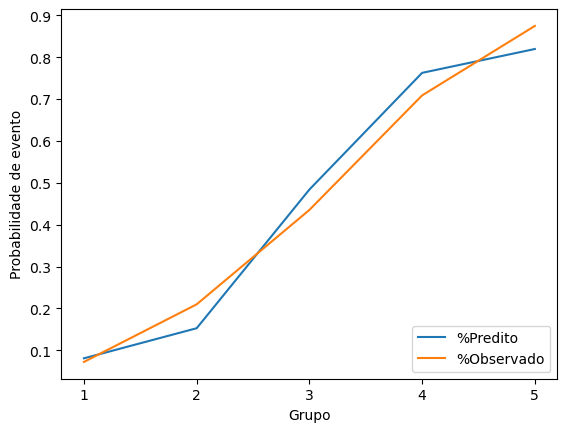

In [69]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['pct_doente'].plot(label='%Predito')
ax = qualid['predito'].plot(label='%Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')


5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

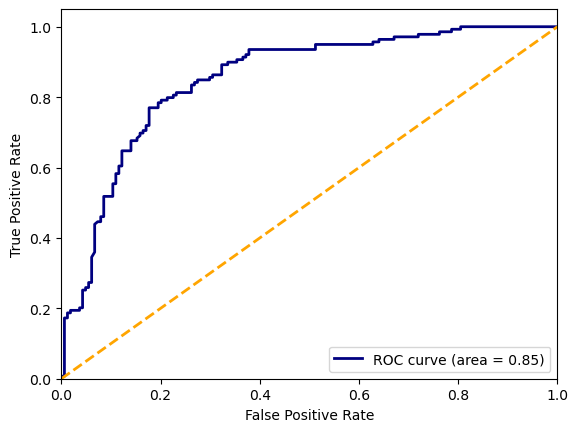

In [77]:
from sklearn.metrics import roc_curve
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])

plt.figure()
lw = 2

fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_)
plt.plot([0, 1], [0, 1], color='orange', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [79]:
from sklearn import metrics
from scipy.stats import ks_2samp

# Acurácia
acc = metrics.accuracy_score(df['flag_doente'], df['predito'] > .5)
print('Acurácia: {0:.2f}%'.format(acc*100))

# AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)

# GINI
gini = 2 * auc_ -1

# KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

# print(f'AUC: {auc_*100:.2f}%')
print(f'GINI: {gini*100:.2f}%')
print(f'KS: {ks*100:.2f}%')

Acurácia: 79.54%
GINI: 70.39%
KS: 59.30%


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [80]:
reglog = smf.logit(formula='''flag_doente 
                            ~ age
                            + sex 
                            + C(cp, Treatment(reference=4))
                            + thalach
                            + exang
                            + oldpeak
                            ''', 
                   data=df).fit()
reglog.summary()

Optimization terminated successfully.
         Current function value: 0.414266
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                            8
Date:                Sun, 10 Aug 2025   Pseudo R-squ.:                  0.3994
Time:                        00:17:56   Log-Likelihood:                -125.52
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 5.652e-32
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -0.6474      2.025     -0.320      0.749      -4.617       3.322
C(cp, Treatment(reference=4))[T.1.0]    -2.1539      0.594     -3.625      0.000      -3.319      -0.989
C(cp, Treatment(reference=4))[T.2.0]    -1.4851      0.485     -3.065      0.002      -2.435      -0.535
C(cp, Treatment(reference=4))[T.3.0]    -1.9797      0.405     -4.893      0.000      -2.773      -1.187
age                                      0.0394      0.020      1.984      0.047       0.000       0.078
sex                                      1.6929      0.379      4.463      0.000       0.949       2.436
thalach                                 -0.0192      0.009     -2.207      0.027      -0.036      -0.002
exang                                    0.8612      0.366      2.354      0.019       0.144       1.578
oldpeak                                  0.6968      0.170      4.108      0.000       0.364       1.029
========================================================================================================
"""

In [82]:
df['predito'] = reglog.predict(exog=df)

# Categorizando essa probabilidade em 5 grupos:
pred_cat = pd.qcut(x=df['predito'], q=5)
group_reg = df.groupby(by=pred_cat, observed=True)
qualid = (group_reg[['flag_doente']].count().rename(columns={'flag_doente':'contagem'}))

# Calculando a probabilidade de evento predita média por grup:
qualid['predito'] = group_reg['predito'].mean()

# Calculando a taxa de eventos (média da variável indicadora de eventos) por grupo:
qualid['pct_doente'] = group_reg['flag_doente'].mean()

# Acurácia
acc = metrics.accuracy_score(df['flag_doente'], df['predito'] > .5)
print('Acurácia: {0:.2f}%'.format(acc*100))

# AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)

# GINI
gini = 2 * auc_ -1

# KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

# print(f'AUC: {auc_*100:.2f}%')
print(f'GINI: {gini*100:.2f}%')
print(f'KS: {ks*100:.2f}%')

Acurácia: 82.84%
GINI: 78.04%
KS: 66.27%


**Conclusão**: Podemos notar uma leve melhoria na acurácia do modelo de 79.54% para 82.84%